## Goals of this assignment

**Everyone should do Part 0 and Part 1 of the individual.md assignment first**

The goal of this assignment is to:

  * read/write CSV between as a way to communicate between R and Python
  * get familiar with pwr 

Specifcally, you will be doing the following.

Within Python

1. Read in the MTCARS data into Python.
2. Create a new column by converting mpg Miles/(US) gallon to liter/100 Kilometers
3. Save the new data frame as a CSV

Within R

4. Load the CSV into R
5. Run a power calculation
6. Save the results to a CSV


## The basic flow is to create Rscripts then run them from Python

So here the *mtcars* data already exists in R and we are just saving it to a CSV for Python to consume

In [1]:
%%writefile example.R
#!/usr/bin/Rscript

a = c("car", names(mtcars))
print(a)

Overwriting example.R


In [2]:
!Rscript example.R

 [1] "car"  "mpg"  "cyl"  "disp" "hp"   "drat" "wt"   "qsec" "vs"   "am"  
[11] "gear" "carb"


## Do the Python portion of the assignment

In [3]:
## Read in the MTCARS data

import pandas as pd
import numpy as np

% matplotlib inline
from pandas.plotting import scatter_matrix
df = pd.read_csv("mtcars.csv")

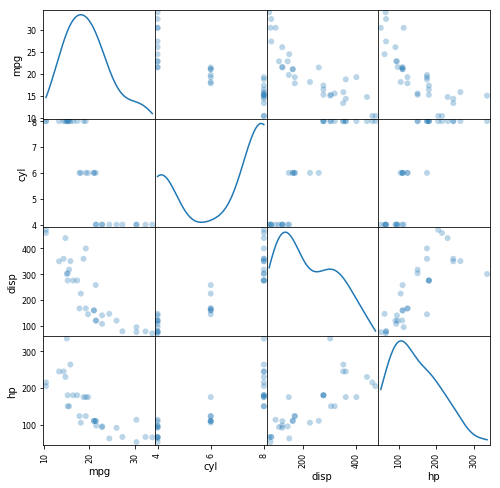

In [4]:
to_plot = df.columns[:5]
scatter_matrix(df[to_plot], alpha=0.3, figsize=(8, 8), diagonal='kde', marker='o');

In [15]:
## Create a new column by converting mpg Miles/(US) gallon to liter/100 Kilometers
df['lp100'] = 235.21 / df['mpg']
hp = df['hp'].values
high_low_hp = np.array(["high"] * hp.size)
high_low_hp[high_low < np.median(hp)] = "low"
df['high_low_hp'] = high_low_hp

In [7]:
## Save the new data frame as a CSV
df.to_csv("mtcars-new.csv",index=False)
print("saved")

saved


## Write some R code to a file for later execution

https://www.statmethods.net/stats/power.html

You could calculate the actual f with the following forula

$$
f = \sqrt{\frac{\sum_i^{k} p_{i} (\mu_{i} - \mu)^2  }{\sigma^{2}}}
$$

* $\sigma^{2}$ - error variance within groups
* $\mu$ - grand mean
* $\mu_i$ - mean of groups $i$
* $N$ - total number of observations
* $n_{i}$ - total number of observations in group $i$
* $p_{i}$ - $n_{i} / N$


In [8]:
df_cyl = df.groupby("cyl")
df_cyl.mean()['lp100']

cyl
4     9.048898
6    11.970180
8    16.058865
Name: lp100, dtype: float64

In [9]:
y = df['cyl'].values
x = df['lp100'].values

var = x.var()
N = x.size
mu = x.mean()

numerator = 0
for k in np.unique(y):
    ginds = np.where(y==k)[0]
    n_i = ginds.size
    p_i = n_i/N
    mu_i = x[ginds].mean()
    numerator += p_i * (mu_i - mu)**2
f = numerator / var
print(f)

0.6662024314998297


In [10]:
%%writefile alternative-soln.R
#!/usr/bin/Rscript

library('pwr')

# read in data
mtcars <- read.csv("mtcars-new.csv")
print(names(mtcars))                                                                                                                       

# scatterplot matrix                                                                                                                      
png("cars_in_r.png")
pairs(~mpg+disp+drat+wt,data=mtcars,main="a scatterplot matrix")
dev.off()

# Compute the analysis of variance
res.aov <- aov(lp100 ~ factor(cyl), data = mtcars)
# Summary of the analysis
summary(res.aov)

# you would need to calculate an appropriate f here
f = 0.667

# calculate power
result <- pwr.anova.test(k=3,f=f,sig.level=.05,power=.8)
print(result)

Overwriting alternative-soln.R


## Run the R code that you just wrote to file

In [11]:
!Rscript alternative-soln.R

 [1] "car"   "mpg"   "cyl"   "disp"  "hp"    "drat"  "wt"    "qsec"  "vs"   
[10] "am"    "gear"  "carb"  "lp100"
null device 
          1 
            Df Sum Sq Mean Sq F value   Pr(>F)    
factor(cyl)  2  308.2  154.11   28.94 1.23e-07 ***
Residuals   29  154.4    5.33                     
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

     Balanced one-way analysis of variance power calculation 

              k = 3
              n = 8.303657
              f = 0.667
      sig.level = 0.05
          power = 0.8

NOTE: n is number in each group



## Display the scatter plot that was created with the R script

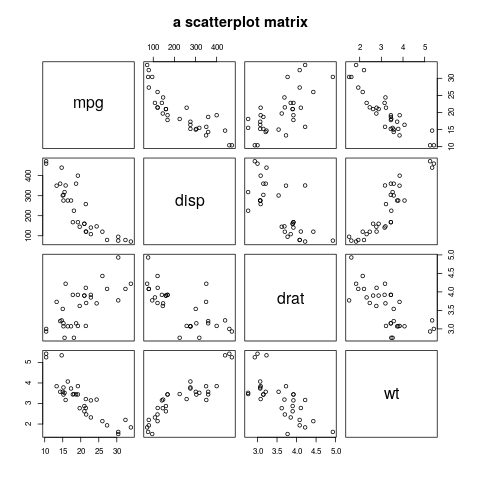

In [12]:
from IPython.display import Image
Image("cars_in_r.png")